In [146]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from collections import Counter
from sklearn import svm, model_selection, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [4]:
style.use('ggplot')

In [5]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2016, 12, 31)

In [6]:
df = web.DataReader('TSLA', 'yahoo', start, end)
print(df.head())
#TESLA market analysis

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


In [7]:
df.to_csv('tsla.csv')

In [23]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


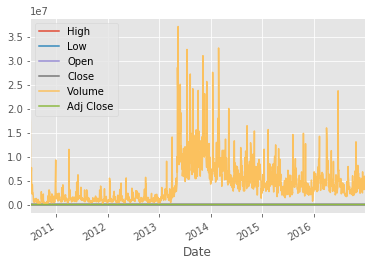

In [12]:
df.plot()
#plt.show()

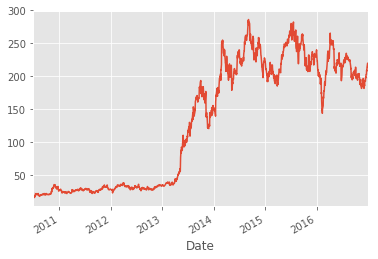

In [13]:
df['Adj Close'].plot()

In [15]:
df[['Open', 'High']]

,Open,High
Date,,
2010-06-29,19.000000,25.000000
2010-06-30,25.790001,30.420000
2010-07-01,25.000000,25.920000
2010-07-02,23.000000,23.100000
2010-07-06,20.000000,20.000000
2010-07-07,16.400000,16.629999
2010-07-08,16.139999,17.520000
2010-07-09,17.580000,17.900000
2010-07-12,17.950001,18.070000


In [32]:
#100 moving average. it takes todays price and 99 previous prices. calculates the average of it.
#Minimum number of observations in window required to have a value (otherwise result is NA). 
#For a window that is specified by an offset, min_periods will default to 1. 
#Otherwise, min_periods will default to the size of the window.
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


In [21]:
#There will be no NAN records for 100ma as we have specified min_peiods = 0
df.dropna(inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2011-04-11,26.530001,25.020000,26.469999,25.270000,1369400,25.270000,26.5132
2011-04-12,25.209999,24.299999,25.080000,24.650000,1357400,24.650000,26.4648
2011-04-13,25.690001,24.809999,25.129999,24.930000,1211500,24.930000,26.4152
2011-04-14,25.280001,24.200001,24.870001,25.139999,983400,25.139999,26.3567
2011-04-15,26.180000,25.410000,25.650000,25.580000,943500,25.580000,26.2785


<BarContainer object of 1640 artists>

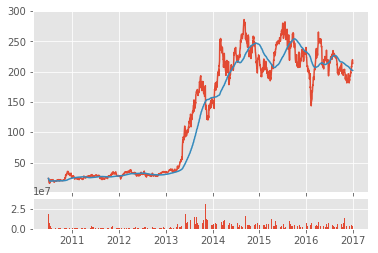

In [34]:
#1sr param = size of grid(6 rows and1 col), 2nd = start position
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

In [60]:
#re-sampling data like we have per second data but we will re-sample data to hourly data
df_ohlc = df['Adj Close'].resample('10D').ohlc() #open high low close
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.head()

,open,high,low,close
Date,,,,
2010-06-29,23.889999,23.889999,15.800000,17.459999
2010-07-09,17.400000,20.639999,17.049999,20.639999
2010-07-19,21.910000,21.910000,20.219999,20.719999
2010-07-29,20.350000,21.950001,19.590000,19.590000
2010-08-08,19.600000,19.600000,17.600000,19.150000


In [59]:
df_volume.head()

Date
2010-06-29    70812000
2010-07-09    19489500
2010-07-19     9184800
2010-07-29     5442600
2010-08-08     5150300
Freq: 10D, Name: Volume, dtype: int64

In [61]:
df_ohlc.reset_index(inplace=True)

In [65]:
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc.head()

,Date,open,high,low,close
0,733952.0,23.889999,23.889999,15.800000,17.459999
1,733962.0,17.400000,20.639999,17.049999,20.639999
2,733972.0,21.910000,21.910000,20.219999,20.719999
3,733982.0,20.350000,21.950001,19.590000,19.590000
4,733992.0,19.600000,19.600000,17.600000,19.150000


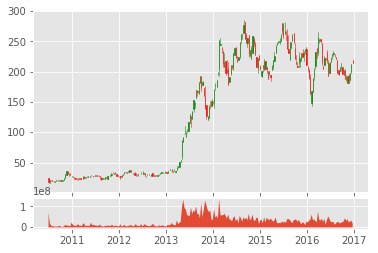

In [68]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
#ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
#ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values,0)
ax2.fill_between(df_volume.index, df_volume.values,0)

In [82]:
import bs4 as bs
import pickle #serilizes any python objects
import requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader as web
import sys

In [86]:
def save_sp500_tickers():
    resp = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'class':'wikitable sortable'})
    tickers=[]
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    
    #print(tickers)
    return tickers
#save_sp500_tickers()
#uncomment to see the output

In [93]:
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2000, 1, 1)
    end = dt.datetime(2016, 12, 31)
    
    for ticker in tickers:
        ticker = ticker.strip()
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            except:
                print("Yahoo doesn't have data for {}".format(ticker))
        else:
            print('Already have {}'.format(ticker))
    
    print('Done')
            
get_data_from_yahoo()

Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AMG
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have AGN
Already have ADS
Already have LNT
Already have ALL
Yahoo doesn't have data for BRK.B
Yahoo doesn't have data for BF.B
Yahoo doesn't have data for CTVA
Yahoo doesn't have data for DOW
Yahoo doesn't have data for FOXA
Yahoo doesn't have data for FOX
Already have M
Yahoo doesn't have data for VMC
Yahoo doesn't have data for ZBH
Done


In [98]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
    
    main_df = pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        try:
            ticker = ticker.strip()
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)
            df.rename(columns={'Adj Close': ticker}, inplace=True)
            df.drop(['Open', 'High', 'Low','Close', 'Volume'], axis=1, inplace=True)

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')

            if count % 10 == 0:
                print(count)
        except FileNotFoundError:
            print("Data is not available for {}".format(ticker))
    
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

compile_data()

0
10
20
30
40
50
60
70
Data is not available for BRK.B
80
Data is not available for BF.B
90
100
110
120
130
Data is not available for CTVA
140
150
Data is not available for DOW
170
180
190
200
Data is not available for FOXA
Data is not available for FOX
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
Data is not available for VMC
480
490
500
Data is not available for ZBH
                  MMM        ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                         
1999-12-31  27.810062  10.119267   NaN  18.37500  NaN  1.151060  16.693562   
2000-01-03  26.815578   9.753512   NaN  18.25000  NaN  1.235628  16.274673   
2000-01-04  25.750059   9.474838   NaN  17.81250  NaN  1.198042  14.909401   
2000-01-05  26.495914   9.457423   NaN  18.00000  NaN  1.202740  15.204173   
2000-01-06  28.626963   9.788344   NaN  18.03125  NaN  1.179249  15.328290   

                 AM

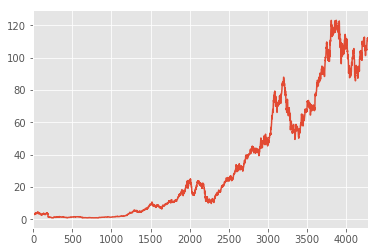

In [99]:
# Lets find relationship between the data. 17 years of data.
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df['AAPL'].plot()
    
visualize_data()

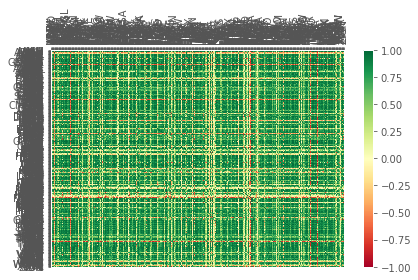

In [102]:
# Lets find relationship between the data. 17 years of data.
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')
    df_corr = df.corr()
    
    #print(df_corr.head())
    
    data = df_corr.values #numpy array
    fig = plt.figure()
    ax = fig.add_subplot(111)
    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn) #plot some colors
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)    
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()
    
visualize_data()

#Invester will look at. if 2 companies are highly correlated and one of deviates then you can 
#invest in one and short the other one, then eventaully they will come together.
#if there is -ve correlation that means both are going in opp direction. then invest in one and short
#the other. if some are Nuterally correlated, then you shouldnt invest in non correlated stocks

In [124]:
def process_data_for_labels(ticker):
    hm_days = 7 #how many days we have to lose or gain
    df = pd.read_csv('sp500_joined_closes.csv', index_col = 0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker])/df[ticker]
        
    #df.fillna(0, inplace=True)
    return tickers, df

#process_data_for_labels('XOM')

In [153]:
# prediction - is this company shares to buy sell or hold.
def buy_sell_hold(*args):
    cols = [c for c in args]
    #print(cols)
    requirement = 0.02
    for col in cols:
        #print(col)
        if col > requirement:
            return 1 #buy
        if col < -requirement:
            return -1 #sell
        
    return 0 #hold

In [144]:
def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    df['{}_target'.format(ticker)] = list(map(buy_sell_hold,
                                             df['{}_{}d'.format(ticker, 1)],
                                             df['{}_{}d'.format(ticker, 2)],
                                             df['{}_{}d'.format(ticker, 3)],
                                             df['{}_{}d'.format(ticker, 4)],
                                             df['{}_{}d'.format(ticker, 5)],
                                             df['{}_{}d'.format(ticker, 6)],
                                             df['{}_{}d'.format(ticker, 7)]))
    
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data Spread:', Counter(str_vals))
    
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    
    return X, y, df

#extract_featuresets('XOM')

In [148]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
    
    clf = neighbors.KNeighborsClassifier()
    
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy: ',confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))
    
    return confidence

do_ml('BAC')

Data Spread: Counter({'-1': 3705, '1': 572, '0': 1})
Predicted spread: Counter({-1: 1049, 1: 21})


0.8635514018691589

In [154]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
    
    clf = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])
    
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy: ',confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))
    
    return confidence

yo = do_ml('BAC')

Data Spread: Counter({'1': 1812, '-1': 1646, '0': 820})


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.41495327102803736
Predicted spread: Counter({-1: 638, 1: 398, 0: 34})
